In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# create a directed graph and add nodes
DG = nx.DiGraph()
DG.add_node("rain")
DG.add_node("sprinkler")
DG.add_node("grass wet")
DG.add_node("sidewalk wet")
DG.add_node("person slipped")

In [3]:
# add edges
edge_list = [("rain", "grass wet", 0.9), ("rain", "sidewalk wet", 0.75), ("sprinkler", "grass wet", 0.8), ("sidewalk wet", "person slipped", 0.4)]
DG.add_weighted_edges_from(edge_list)
list(DG.edges)

[('rain', 'grass wet'),
 ('rain', 'sidewalk wet'),
 ('sprinkler', 'grass wet'),
 ('sidewalk wet', 'person slipped')]

In [4]:
# neighbors list *direct* children (out-edges)
print(list(DG.neighbors("rain")))
print(list(DG.neighbors("grass wet")))


# see all out-edges
print(list(DG.out_edges("rain")))



# see all weights for every edge in the graph
nx.get_edge_attributes(DG, 'weight')

['grass wet', 'sidewalk wet']
[]
[('rain', 'grass wet'), ('rain', 'sidewalk wet')]


{('rain', 'grass wet'): 0.9,
 ('rain', 'sidewalk wet'): 0.75,
 ('sprinkler', 'grass wet'): 0.8,
 ('sidewalk wet', 'person slipped'): 0.4}

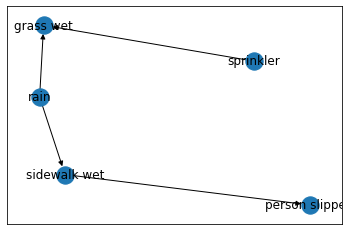

In [5]:
# draw the graph
nx.draw_networkx(DG)

# Networkx graph edit distance function

In [6]:
# create subgraphs of DG
DG_s1 = DG.subgraph(['rain', 'grass wet', 'sidewalk wet'])
DG_s2 = DG.subgraph(['sprinkler', 'grass wet'])

{('rain', 'grass wet'): 0.9, ('rain', 'sidewalk wet'): 0.75}

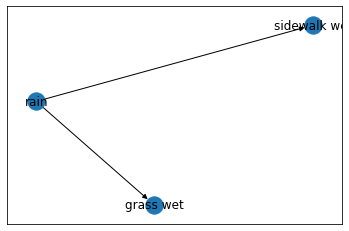

In [43]:
nx.draw_networkx(DG_s1) #display subgraph 1
nx.get_edge_attributes(DG_s1, 'weight')  #see all weights for every edge in subgraph 1

{('sprinkler', 'grass wet'): 0.8}

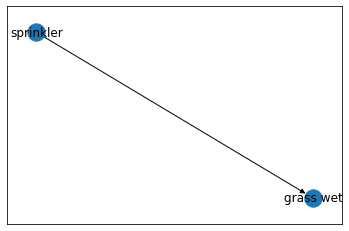

In [8]:
nx.draw_networkx(DG_s2)  # display subgraph 2
nx.get_edge_attributes(DG_s2, 'weight')  #see all weights for every edge in subgraph 2

In [33]:
# calculate optimal (minimum possible) graph edit distance between subgraphs DG_s1 and DG_s2. Returns cost value.
for v in nx.optimize_graph_edit_distance(DG_s1, DG_s2):
    minv = v

minv

2.0

In [36]:
# Find optimal (minimum possible) graph edit path. Returns node_edit_path, edge_edit_path, and cost value.
for x in nx.optimize_edit_paths(DG_s1, DG_s2):
    minx = x
    
minx

([('rain', 'sprinkler'), ('grass wet', None), ('sidewalk wet', 'grass wet')],
 [(('rain', 'grass wet'), None),
  (('rain', 'sidewalk wet'), ('sprinkler', 'grass wet'))],
 2.0)